# Changing Jobs Of Data Scientists
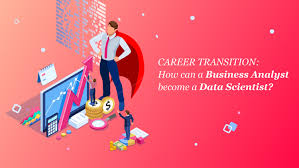

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

So this dataset designed to understand the factors that lead a person will work for the company , by model(s) that uses the current credentials/demographics/experience to predict the probability of a candidate to look for a new job or will work for the company.

# Packages for the notebook

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
# Packages for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from collections import defaultdict
import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
# Importing keras 
from keras.models import Sequential
from keras.layers import Dense
import keras
# Importing packages for SMOTE
from imblearn.over_sampling import SMOTE
plotly.offline.init_notebook_mode (connected = True)

# Importing the data

In [ ]:
data=pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
test=pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')

### **The Features of the dataset are as following :**
* enrollee_id : Unique ID for candidate

* city: City code

* city_ development _index : Developement index of the city (scaled)

* gender: Gender of candidate

* relevent_experience: Relevant experience of candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline :Education major discipline of candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type : Type of current employer

* lastnewjob: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for job change, 1 – Looking for a job change

# First look at the data

In [ ]:
data.head()

# Let's Look at a heatmap for the data

In [ ]:
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)
cols=['city_development_index','training_hours','enrollee_id','target']
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=['city_development_index','training_hours','enrollee_id'],inplace=True)

In [ ]:
d = defaultdict(LabelEncoder)
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test=df_test.apply(lambda x: d[x.name].transform(x))

In [ ]:
df_train[cols]=data[cols]
df_test[['city_development_index','training_hours','enrollee_id']]=test[['city_development_index','training_hours','enrollee_id']]

In [ ]:
# Plotly code to make a heatmap
x=list(df_train.corr().columns)
y=list(df_train.corr().index)
values=np.array(df_train.corr().values)
fig = go.Figure(data=go.Heatmap(
    z=values,
    x=x,
    y=y,
                   
    
                   hoverongaps = False))
fig.show()

Conclusion:
From the above heatmap we can clearly observe that the target has a high dependance on the city_development_index which means candidates from city with higher amount of development index tends to move towards the field of data science .

We also see high correlation of experience of the candidate and the company he applied for which means that most of the candidates try to apply for the companies on the basis of their experience in the field which is kind of a common knowledge .

We can also see the dependence of the amount of relevant experience gained by the candidate to the course that he enrolled to the specific university .

# Box Plot for training hours

In [ ]:
px.box(data_frame=data,x='target',y='training_hours')

Well from this we can see that the number of hours used to train a candidate don't actually contribute a lot to the decision to change the fields for the candidate .

We can also see that the average amount of time for the course given to the candidates is 46-48 hrs.

# Box plot for City index

In [ ]:
px.box(data_frame=data,x='target',y='city_development_index')

From this plot we can clearly see that most of the candidates who dont change ther respective fields are from the cities with the city index between 0.8 to 0.9 but the candidates who actually change their fields lie between the range of 0.6 to 0.9 .

It can also mean that if the index of the cities development is above 0.85 there is a higher chance that the candidates won't change their respective jobs.

# Feature Selection for the Model

In [ ]:
# Selecting top 8 features from the dataset
p=SelectKBest(score_func=f_classif,k=8)
fit=p.fit(df_train.drop(columns=['target']),df_train['target'])

In [ ]:
features=fit.transform(df_train.drop(columns=['target']))
print(features[:5,:])

Well since the names of the features aren't written here let me simplify it for you the 8 features that are selected are :

city , city_develtopment_index,gender,relevent_experience,enrolled_university,education_level,company_size,company_type

# Let's make a seperate data frame using these columns

In [ ]:
data2=df_train[["city" , "city_development_index","gender","relevent_experience","enrolled_university","education_level","company_size","company_type",'target']]

In [ ]:
data2.head()

# Process the data and oversample it :)

In [ ]:
X=data2.drop(columns=['target']).values
y=data2['target'].values

In [ ]:
data2.target.value_counts()

From this we can clearly see that the target 0 is in majority which will effect our model so we will use SMOTE (Synthetic Minority Over-sampling Technique) which will help us to create more synthetic data for the minority class 1 :)

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
count_1=0
count_0=0
for i in y:
    if int(i)==1:
        count_1+=1
    else:
        count_0+=1
print('The number of 1 in the target now are: ',count_1)
print('The number of 0 in the target now are: ',count_0)

After oversampling we can see we got both of them as same

# Applying Models 

## Doing test train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trying out Decision Tree Classifier 

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

In [ ]:
print('The accuracy score with using the decision tree classifier is :',accuracy_score(y_test,dtc.predict(X_test)))

## Let's try XGB classifier

In [ ]:
xgbc=XGBClassifier()

In [ ]:
xgbc.fit(X_train,y_train)

In [ ]:
print('The accuracy using the XGBclassifier is :',accuracy_score(y_test,xgbc.predict(X_test)))

Well we can see a better accuracy than the Decision tree classifier 

## Trying out Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
print('the accuracy using the random forest classifier is :',accuracy_score(y_test,rfc.predict(X_test)))

Still a better score than the Decision Tree Classifier but worse than the XGboost

## Trying out LGBClassifier 

In [ ]:
lgbmc=LGBMClassifier()

In [ ]:
lgbmc.fit(X_train,y_train)

In [ ]:
print('The accuracy socre using the lightGBMClassifier is :',accuracy_score(y_test,lgbmc.predict(X_test)))

This is a good score but less than XGBClassifier

## Trying out NN

In [ ]:
# Added Dropout here so that no overfitting occurs 
model = keras.Sequential([keras.layers.Flatten(input_shape =(8,1)),
                keras.layers.Dense(128,activation = 'sigmoid'),    
                                        keras.layers.Dense(64,activation = 'sigmoid'),    
                          keras.layers.Dropout(0.4),
                keras.layers.Dense(32,activation = 'sigmoid'),    
                          keras.layers.Dropout(0.1),

                keras.layers.Dense(2,activation = 'sigmoid')])
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
model.fit(X_train, y_train,epochs = 12,batch_size=30,steps_per_epoch=500)


In [ ]:
print('The accuracy score using the Deep Neural Network',accuracy_score(model.predict_classes(X_test),y_test))

well we got 73.5 percent accuracy using the neural network

# Seeing all the models used we can clearly see that the XGBClassifier performed the best with 84.8 percent accuracy :)

In [ ]:
# Getting the 8 columns from the test data
test_data=df_test[["city" , "city_development_index","gender","relevent_experience","enrolled_university","education_level","company_size","company_type"]]

In [ ]:
predictions=xgbc.predict(test_data.values)

In [ ]:
submission=pd.DataFrame()

In [ ]:
submission['enrollee_id']=df_test['enrollee_id']
submission['target']=predictions

In [ ]:
submission.head()

In [ ]:
submission.target.value_counts()

In [ ]:
submission.to_csv('Submissions.csv',index=False)

# Thank you for looking at my file :)
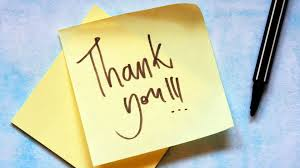